In [1]:
#!pip uninstall -y fbprophet
#!pip uninstall -y pystan
#!pip install fbprophet
#!pip install pystan==2.19.1.1

In [2]:
# Bibliotecas básicas de data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

# Para baixar os dados
import yfinance as yf


#Para aplicar o ARIMA:
from statsmodels.tsa.stattools import adfuller          #verificar dados estacionários
from statsmodels.tsa.stattools import acf, pacf         #correlação
from statsmodels.tsa.seasonal import seasonal_decompose #Decomposição sazonal usando médias móveis.
from statsmodels.tsa.arima.model import ARIMA           #algoritmo arima

# Para deep learning
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.sequence import TimeseriesGenerator

# Para machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Prophet
from prophet import Prophet

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
df = pd.read_excel('/content/Dados Históricos - Ibovespa.xlsx')

In [4]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2019-01-02,134185,134194,134389,133832,"7,81M",-0.0001
1,2019-01-03,134194,133523,134195,133328,"6,17M",0.0049
2,2019-01-04,133533,132753,133645,132753,"5,15M",0.0059
3,2019-01-07,132753,132182,133035,132094,"8,23M",0.0043
4,2019-01-08,132182,130826,132277,130822,"8,68M",0.0105


In [5]:
from datetime import datetime

In [6]:
df['Data'] = pd.to_datetime(df['Data'])

In [7]:
df.index = pd.to_datetime(df.Data, format = "%m-%d-%Y")

In [8]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,,
2019-01-02,2019-01-02,134185,134194,134389,133832,"7,81M",-0.0001
2019-01-03,2019-01-03,134194,133523,134195,133328,"6,17M",0.0049
2019-01-04,2019-01-04,133533,132753,133645,132753,"5,15M",0.0059
2019-01-07,2019-01-07,132753,132182,133035,132094,"8,23M",0.0043
2019-01-08,2019-01-08,132182,130826,132277,130822,"8,68M",0.0105


In [9]:
df.drop("Data", inplace= True, axis=1)

In [10]:
df.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2019-01-02,134185,134194,134389,133832,"7,81M",-0.0001
2019-01-03,134194,133523,134195,133328,"6,17M",0.0049
2019-01-04,133533,132753,133645,132753,"5,15M",0.0059
2019-01-07,132753,132182,133035,132094,"8,23M",0.0043
2019-01-08,132182,130826,132277,130822,"8,68M",0.0105


In [11]:
df.drop(columns=['Abertura','Máxima','Mínima','Vol.','Var%'], inplace=True)

In [14]:
df = df.reset_index('Data')

In [15]:
df[['ds','y']] = df[['Data','Último']]



In [16]:
df.head()

,Data,Último,ds,y
0,2019-01-02,134185,2019-01-02,134185
1,2019-01-03,134194,2019-01-03,134194
2,2019-01-04,133533,2019-01-04,133533
3,2019-01-07,132753,2019-01-07,132753
4,2019-01-08,132182,2019-01-08,132182


In [17]:
train_data = df.sample(frac=0.8, random_state=0)
test_data = df.drop(train_data.index)
print(f'training data size : {train_data.shape}')
print(f'testing data size : {test_data.shape}')

training data size : (994, 4)
testing data size : (248, 4)


In [18]:
modelo = Prophet(daily_seasonality=True)
modelo.fit(train_data)
dataFramefuture = modelo.make_future_dataframe(periods=20, freq='M')
previsao = modelo.predict(dataFramefuture)
previsao.head()

DEBUG:cmdstanpy:input tempfile: /tmp/tmph0y22b2u/wm94g57n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph0y22b2u/ermbbcjt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69236', 'data', 'file=/tmp/tmph0y22b2u/wm94g57n.json', 'init=/tmp/tmph0y22b2u/ermbbcjt.json', 'output', 'file=/tmp/tmph0y22b2u/prophet_model86ngkzi6/prophet_model-20240127163652.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:36:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:36:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-02,131014.541558,121427.342357,134570.705629,131014.541558,131014.541558,-2835.372899,-2835.372899,-2835.372899,-6503.524338,...,-185.799116,-185.799116,-185.799116,3853.950555,3853.950555,3853.950555,0.0,0.0,0.0,128179.168659
1,2019-01-03,130960.386726,122060.439515,134889.226703,130960.386726,130960.386726,-2929.875128,-2929.875128,-2929.875128,-6503.524338,...,-273.156986,-273.156986,-273.156986,3846.806197,3846.806197,3846.806197,0.0,0.0,0.0,128030.511598
2,2019-01-04,130906.231893,121474.922049,134568.782939,130906.231893,130906.231893,-2988.383069,-2988.383069,-2988.383069,-6503.524338,...,-317.124082,-317.124082,-317.124082,3832.265352,3832.265352,3832.265352,0.0,0.0,0.0,127917.848824
3,2019-01-07,130743.767396,120947.520214,134689.415718,130743.767396,130743.767396,-2997.493496,-2997.493496,-2997.493496,-6503.524338,...,-230.718022,-230.718022,-230.718022,3736.748865,3736.748865,3736.748865,0.0,0.0,0.0,127746.273900
4,2019-01-08,130689.612563,120602.909861,133918.535658,130689.612563,130689.612563,-3436.749060,-3436.749060,-3436.749060,-6503.524338,...,-619.076709,-619.076709,-619.076709,3685.851988,3685.851988,3685.851988,0.0,0.0,0.0,127252.863504


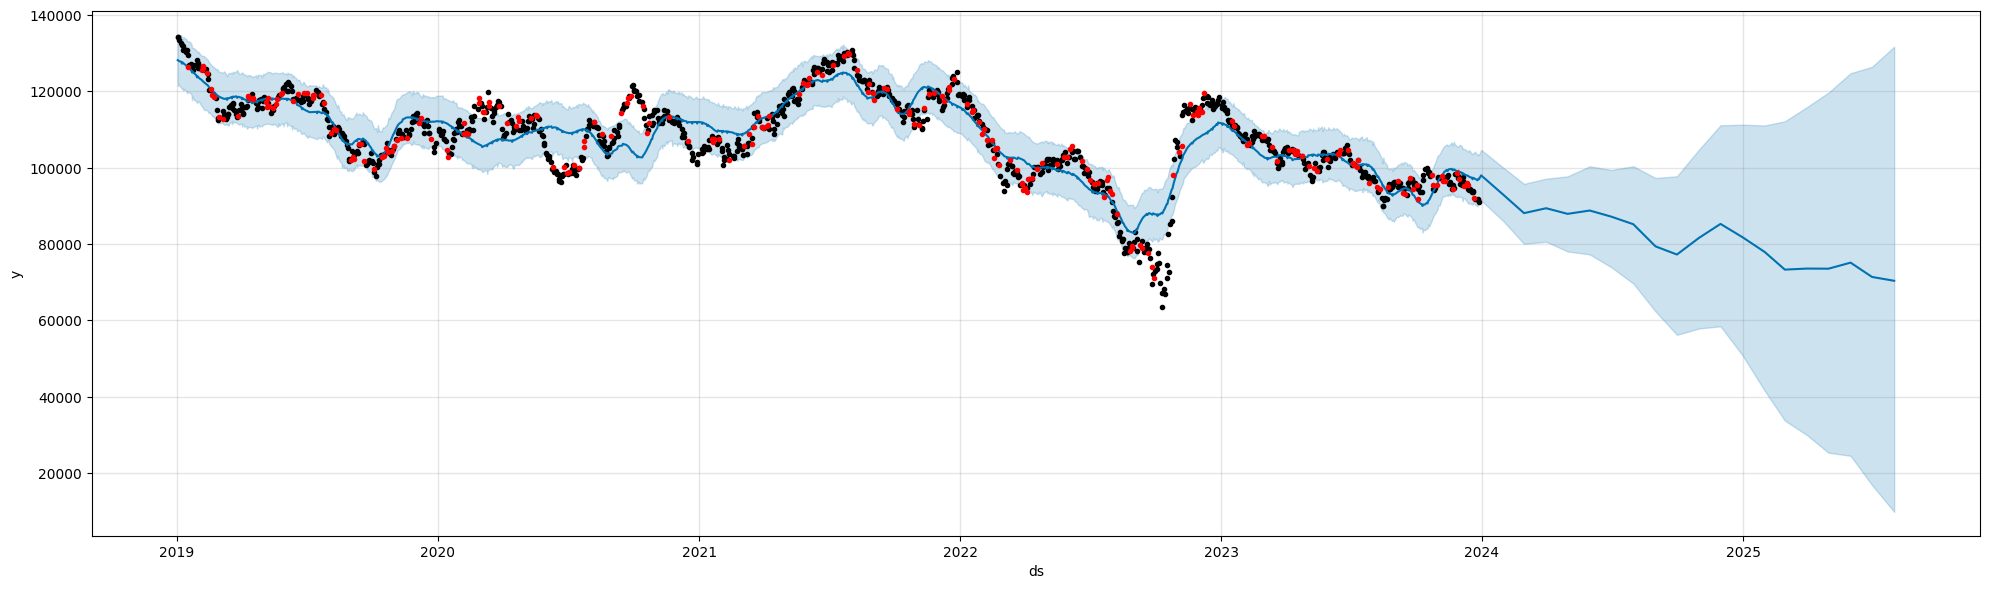

In [19]:
modelo.plot(previsao, figsize=(20,6));
plt.plot(test_data['ds'], test_data['y'], '.r')

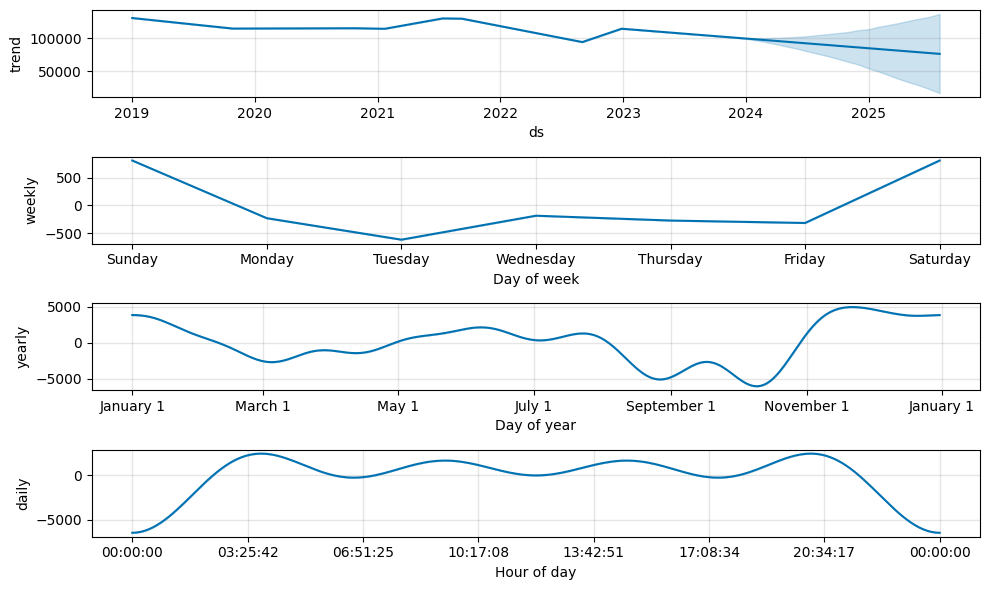

In [20]:
modelo.plot_components(previsao, figsize=(10,6));

In [21]:

previsao_cols = ['ds', 'yhat']
valores_reais_cols = ['ds', 'y']

previsao = previsao[previsao_cols]
valores_reais = train_data[valores_reais_cols]


resultados = pd.merge(previsao, valores_reais, on='ds', how='inner')

resultados['erro_percentual_absoluto'] = np.abs((resultados['y'] - resultados['yhat']) / resultados['y']) * 100


mape = np.mean(resultados['erro_percentual_absoluto'])

print(f"MAPE: {mape:.2f}%")

MAPE: 3.77%


In [22]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(modelo, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 5 forecasts with cutoffs between 2021-01-07 00:00:00 and 2022-12-28 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmph0y22b2u/14549mce.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph0y22b2u/xj94z9zf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68303', 'data', 'file=/tmp/tmph0y22b2u/14549mce.json', 'init=/tmp/tmph0y22b2u/xj94z9zf.json', 'output', 'file=/tmp/tmph0y22b2u/prophet_modellx3qpnsw/prophet_model-20240127163837.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:38:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:38:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmph0y22b2u/a3_rkmw0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph0y22b2u/qqo2d7qq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [23]:
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-01-08,100415.361590,97563.962698,103440.611389,105554,2021-01-07
1,2021-01-11,99873.431870,96892.170945,102694.410097,104891,2021-01-07
2,2021-01-12,99512.382984,96871.755863,102239.479856,105244,2021-01-07
3,2021-01-13,99249.076533,96314.772566,102108.487532,105500,2021-01-07
4,2021-01-14,99054.422741,96059.282995,101855.651612,105020,2021-01-07


In [24]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,9.843514e+07,9921.448387,7955.159699,0.072819,0.054460,0.075635,0.272727
1,37 days,1.014398e+08,10071.730468,8136.652619,0.074421,0.055574,0.077251,0.267677
2,38 days,1.036510e+08,10180.915401,8297.809649,0.075810,0.059250,0.078550,0.257576
3,39 days,1.059994e+08,10295.602917,8449.684906,0.077557,0.061755,0.080140,0.249158
4,40 days,1.098439e+08,10480.644006,8680.278123,0.080040,0.066571,0.082550,0.237374
...,...,...,...,...,...,...,...,...
322,361 days,9.408954e+08,30674.018700,24666.672307,0.233715,0.158562,0.221586,0.787879
323,362 days,9.367735e+08,30606.756413,24696.897733,0.233731,0.168901,0.222780,0.782828
324,363 days,9.674756e+08,31104.269185,25006.682149,0.237248,0.193122,0.225284,0.787879
325,364 days,1.015063e+09,31860.059567,25646.255945,0.243968,0.196503,0.230546,0.787879


In [ ]:
df = df_